In [2]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [3]:
# Load csv file and clean 
mvc_df = pd.read_csv(
    Path("../motor-vehicle-collisions/Motor_Vehicle_Collisions_-_Crashes.csv"),
    index_col="CRASH DATE",
    parse_dates=True,
    infer_datetime_format=True
)
print(mvc_df.head())

           CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
CRASH DATE                                                        
2021-09-11       2:39       NaN       NaN        NaN        NaN   
2022-03-26      11:45       NaN       NaN        NaN        NaN   
2022-06-29       6:55       NaN       NaN        NaN        NaN   
2021-09-11       9:35  BROOKLYN   11208.0  40.667202 -73.866500   
2021-12-14       8:13  BROOKLYN   11233.0  40.683304 -73.917274   

                           LOCATION           ON STREET NAME  \
CRASH DATE                                                     
2021-09-11                      NaN    WHITESTONE EXPRESSWAY   
2022-03-26                      NaN  QUEENSBORO BRIDGE UPPER   
2022-06-29                      NaN       THROGS NECK BRIDGE   
2021-09-11    (40.667202, -73.8665)                      NaN   
2021-12-14  (40.683304, -73.917274)          SARATOGA AVENUE   

            NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
CRASH DATE    

In [4]:
print(mvc_df.columns)

Index(['CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')


In [5]:
#Filtering and drop unwanted columns
unnamed_columns = mvc_df.columns[mvc_df.columns.str.contains('Unnamed')]

In [6]:
#Remove 'Unnamed' columns from mvc_df
mvc_df_uc = mvc_df.drop(columns=unnamed_columns)

In [7]:
#Display updated column names and first few rows of new df
print(mvc_df_uc.columns)
print(mvc_df_uc.head())

Index(['CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1'],
      dtype='object')
           CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
CRASH DATE                                                        
2021-09-11       2:39       NaN       NaN        NaN        NaN   
2022-03-26      11:45       NaN       NaN        NaN        NaN   
2022-06-29       6:55       NaN       NaN        NaN        NaN   
2021-09-11       9:35  BROOKLYN   11208.0  40.667202 -73.866500   
2021-12-14       8:13  BROOKLYN   11233.0  40.683304 -73.917274   

                           LOCATION           ON STREET 

In [8]:
#Checkpoint save mark for csv file
mvc_df_uc.to_csv('removed_unnamed_columns.csv',index=False)

In [9]:
#Removing NaN values from following list of columns
col_with_nan = ['CRASH TIME','BOROUGH','ZIP CODE','LATITUDE','LONGITUDE','LOCATION','ON STREET NAME','NUMBER OF PERSONS INJURED',
                 'NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED',
                 'NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1',
                 'COLLISION_ID','VEHICLE TYPE CODE 1']

In [10]:
#Removing the NaN values
clean_df = mvc_df_uc.dropna(subset=col_with_nan)

In [11]:
#Display cleaned Data
print(clean_df)

           CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
CRASH DATE                                                         
2021-12-14      14:58  MANHATTAN   10017.0  40.751440 -73.973970   
2021-12-14      16:50     QUEENS   11413.0  40.675884 -73.755770   
2021-12-14      23:10     QUEENS   11434.0  40.666840 -73.789410   
2021-12-11      19:43      BRONX   10463.0  40.872620 -73.904686   
2021-12-13       6:30     QUEENS   11372.0  40.753730 -73.885050   
...               ...        ...       ...        ...        ...   
2016-09-06      10:30  MANHATTAN   10019.0  40.766045 -73.983376   
2016-09-06      13:01   BROOKLYN   11206.0  40.701910 -73.936990   
2016-09-12       7:18   BROOKLYN   11207.0  40.678593 -73.896545   
2016-09-09      10:42   BROOKLYN   11221.0  40.685635 -73.929596   
2016-09-08      23:35  MANHATTAN   10035.0  40.802753 -73.933580   

                           LOCATION                    ON STREET NAME  \
CRASH DATE                                

In [12]:
#Save cleaned CSV file
clean_df.to_csv('cleaned_dataset.csv',index=False)

In [13]:
#Display summary statistics
print(clean_df.describe())

            ZIP CODE       LATITUDE      LONGITUDE  NUMBER OF PERSONS INJURED  \
count  407966.000000  407966.000000  407966.000000              407966.000000   
mean    10881.770861      40.563583     -73.629359                   0.361712   
std       541.015569       2.530498       4.591797                   0.732827   
min     10000.000000       0.000000     -74.253930                   0.000000   
25%     10453.000000      40.665558     -73.971420                   0.000000   
50%     11208.000000      40.714878     -73.921420                   0.000000   
75%     11355.000000      40.766502     -73.862591                   1.000000   
max     11697.000000      40.912468       0.000000                  27.000000   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count             407966.000000                  407966.000000   
mean                   0.001672                       0.064552   
std                    0.043862                       0.262527   
min   

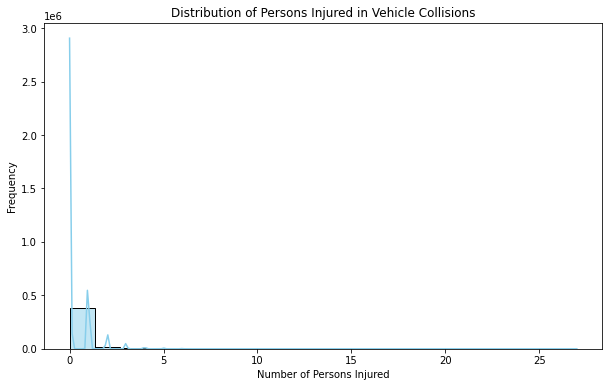

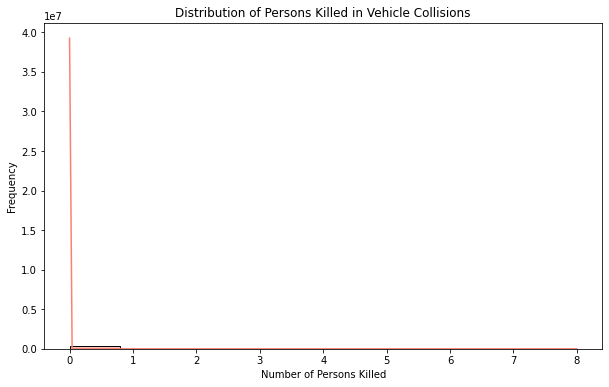

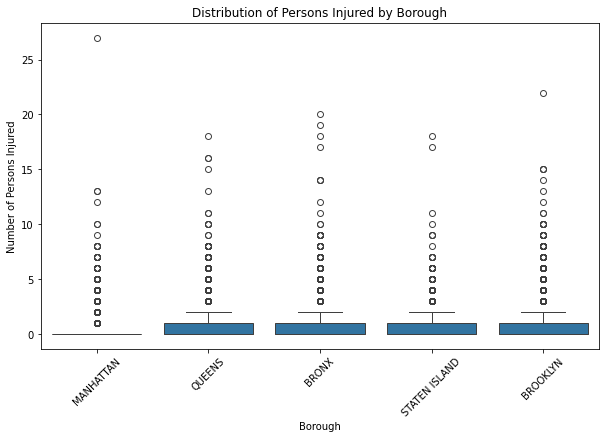

In [14]:
# Histogram of 'NUMBER OF PERSONS INJURED'  
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['NUMBER OF PERSONS INJURED'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Persons Injured in Vehicle Collisions')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'NUMBER OF PERSONS KILLED'
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['NUMBER OF PERSONS KILLED'], bins=10, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of Persons Killed in Vehicle Collisions')
plt.xlabel('Number of Persons Killed')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'NUMBER OF PERSONS INJURED' by 'BOROUGH'
plt.figure(figsize=(10, 6))
sns.boxplot(x='BOROUGH', y='NUMBER OF PERSONS INJURED', data=clean_df)
plt.title('Distribution of Persons Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Injured')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Based on the first histogram of Numbers of Persons Injured, the x-axis shows the numbers of persons injured from motor vehicle collisions
# and the y-axis shows the frequency(count) of collision corresponding to each numbers of persons injured.

#